# Análisis Exploratorio de Datos (EDA)

**EDA:** enfoque inicial para analizar un conjunto de datos que utiliza estadísticas y visualizaciones para comprenderlo mejor, encontrar patrones y detectar anomalías antes de un análisis más formal. 

## **Librerías**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# configuración del renderizador para entornos de notebook
pio.renderers.default = "notebook"

## **Cargar datos**

In [2]:
# ruta 
ruta = r"C:\Users\fnaje\OneDrive\Documents\UniAndes\2do Seminario\ejemplo-proyecto-demo-games\data\processed\games_clean.csv"

In [3]:
# leer archivo
games_clean = pd.read_csv(ruta)

In [4]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   videogame_names            8296 non-null   object 
 1   platform                   8296 non-null   object 
 2   year_of_release            8296 non-null   int64  
 3   genre                      8296 non-null   object 
 4   na_sales                   8296 non-null   float64
 5   eu_sales                   8296 non-null   float64
 6   jp_sales                   8296 non-null   float64
 7   other_sales                8296 non-null   float64
 8   critic_score               8296 non-null   float64
 9   user_score                 8296 non-null   float64
 10  rating_esrb                8296 non-null   object 
 11  total_sales                8296 non-null   float64
 12  gen_platform               8296 non-null   object 
 13  classification_user_score  8296 non-null   objec

## **Visualizaciones con Pandas**

Pandas tiene métodos de visualización básicos incorporados. Son rápidos para un primer vistazo, especialmente series de tiempo. 

In [5]:
# calcular ventas totales por año
ventas_por_anio = games_clean.groupby("year_of_release")["total_sales"].sum()

In [6]:
ventas_por_anio

year_of_release
1980      1.05
1981      0.93
1982      0.62
1985      1.07
1988      0.03
1989      4.17
1990      1.40
1991     12.11
1992      7.91
1994     23.56
1995      5.45
1996     22.34
1997     50.13
1998     52.24
1999     56.72
2000     92.85
2001    268.92
2002    312.10
2003    284.46
2004    340.45
2005    355.71
2006    429.47
2007    481.19
2008    534.52
2009    497.67
2010    449.85
2011    404.55
2012    313.08
2013    299.97
2014    262.52
2015    192.56
2016    100.92
Name: total_sales, dtype: float64

### **Gráfico de líneas**

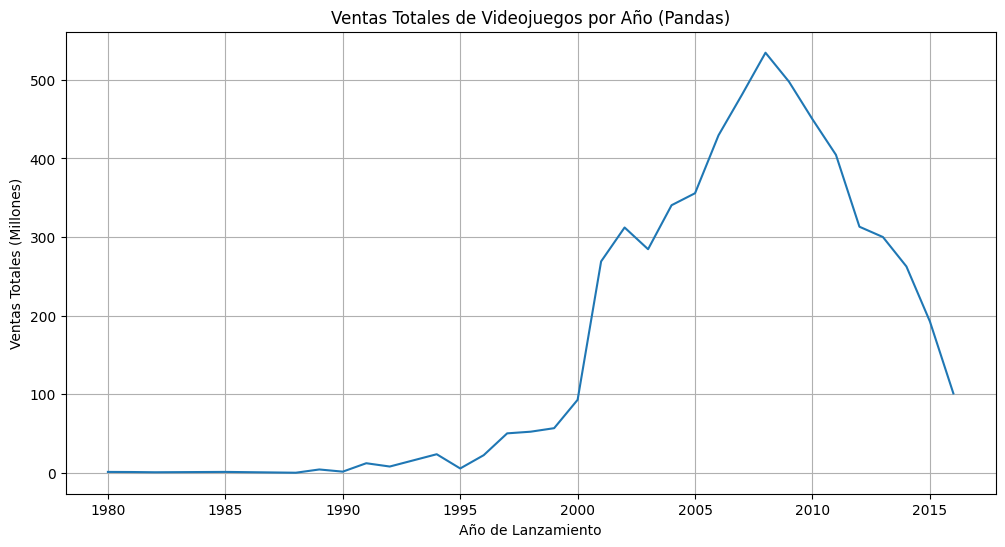

In [7]:
# gráfico de líneas simple con Pandas
ventas_por_anio.plot(
    kind='line',
    figsize=(12, 6), # tamaño de la figura
    title='Ventas Totales de Videojuegos por Año (Pandas)',
    xlabel='Año de Lanzamiento',
    ylabel='Ventas Totales (Millones)'
)
plt.grid(True) # añadir una cuadrícula
plt.show() # mostrar el gráfico

### **Gráfico de barras**

In [8]:
# calcular ventas totales por género
ventas_por_genero = games_clean.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [9]:
ventas_por_genero

genre
Action          1376.78
Sports           954.22
Shooter          849.37
Role-Playing     538.61
Racing           511.89
Misc             459.63
Platform         428.43
Fighting         268.28
Simulation       220.17
Adventure         96.30
Puzzle            84.32
Strategy          72.52
Name: total_sales, dtype: float64

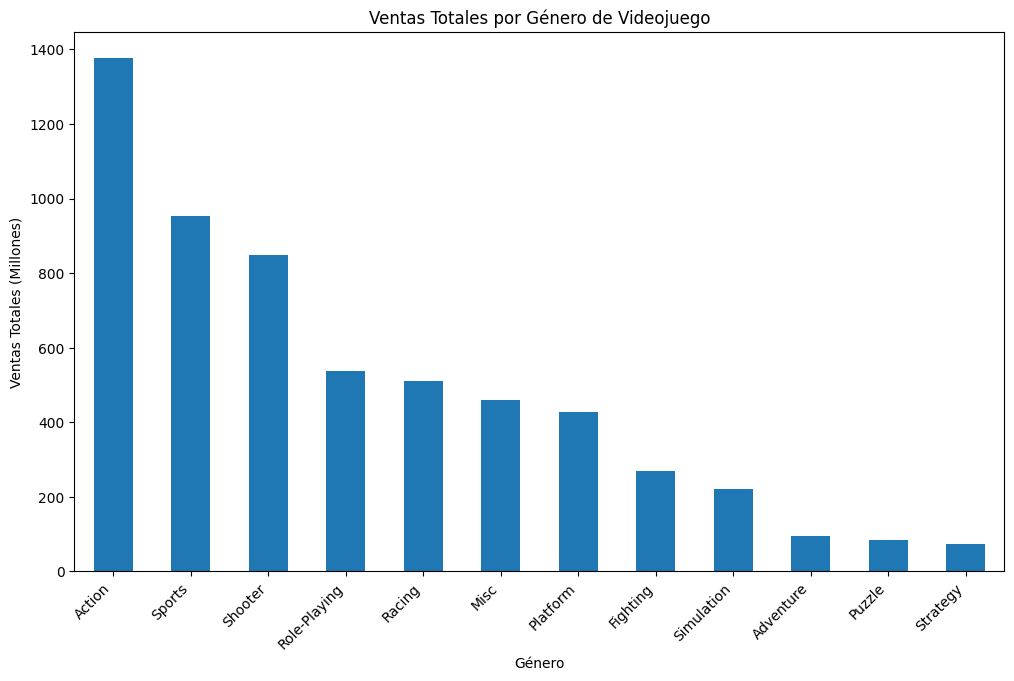

In [10]:
# gráfico de barras
ventas_por_genero.plot(
    kind='bar',
    figsize=(12, 7),
    title='Ventas Totales por Género de Videojuego',
    xlabel='Género',
    ylabel='Ventas Totales (Millones)'
)
plt.xticks(rotation=45, ha='right') # rotar etiquetas para legibilidad
#plt.tight_layout()
plt.show()

### **Histograma**

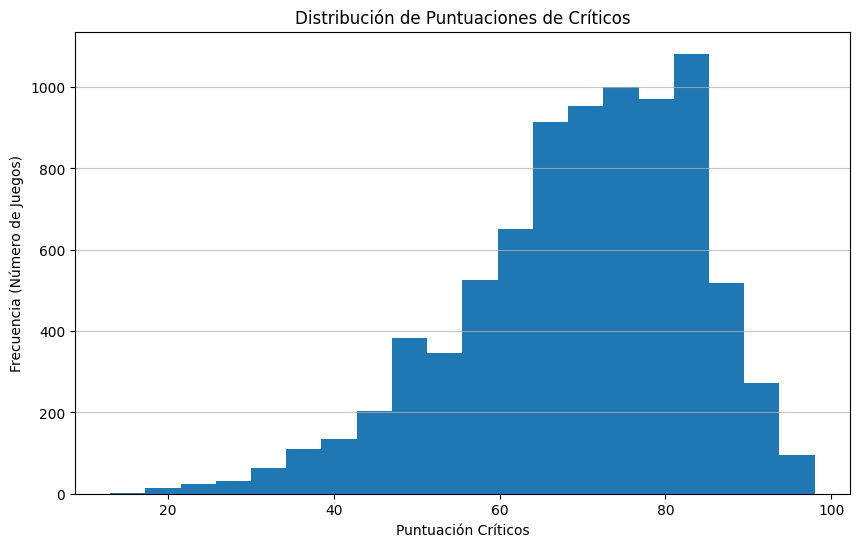

In [11]:
games_clean['critic_score'].plot(
    kind='hist',
    bins=20, # número de "barras" en el histograma
    figsize=(10, 6),
    title='Distribución de Puntuaciones de Críticos',
    xlabel='Puntuación Críticos'
)
plt.ylabel('Frecuencia (Número de Juegos)')
plt.grid(axis='y', alpha=0.75) # añadir rejilla horizontal
plt.show()

### **Gráfico de dispersión**

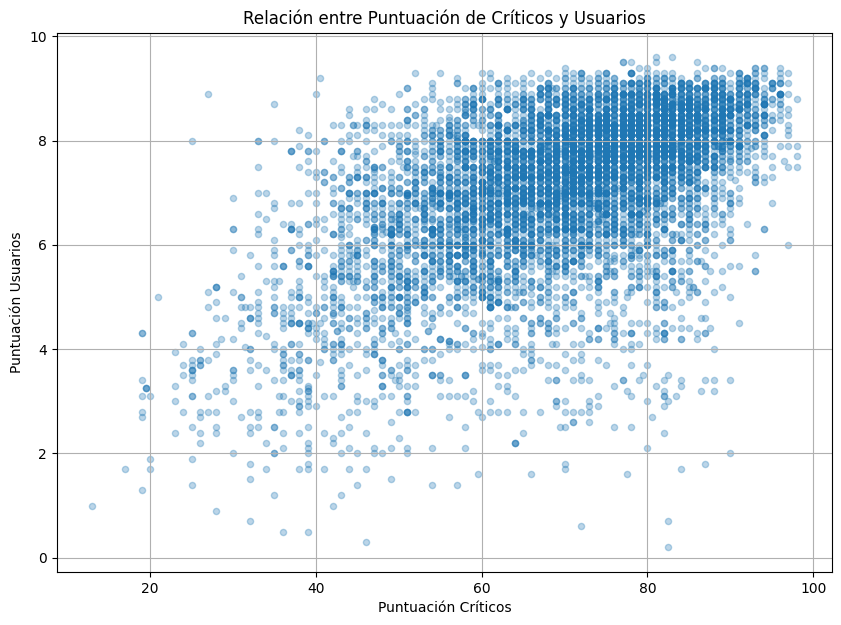

In [12]:
games_clean.plot(
    kind='scatter',
    x='critic_score', # variable en el eje X
    y='user_score',   # variable en el eje Y
    alpha=0.3,        # transparencia para ver puntos superpuestos
    figsize=(10, 7),
    title='Relación entre Puntuación de Críticos y Usuarios'
)
plt.xlabel('Puntuación Críticos')
plt.ylabel('Puntuación Usuarios')
plt.grid(True)
plt.show()

## **Visualizaciones con Matplotlib**

`Matplotlib` es la librería fundamental. `Seaborn` y `Pandas` `.plot()` la usan por debajo. Es útil para personalizar.

### Gráfico de líneas

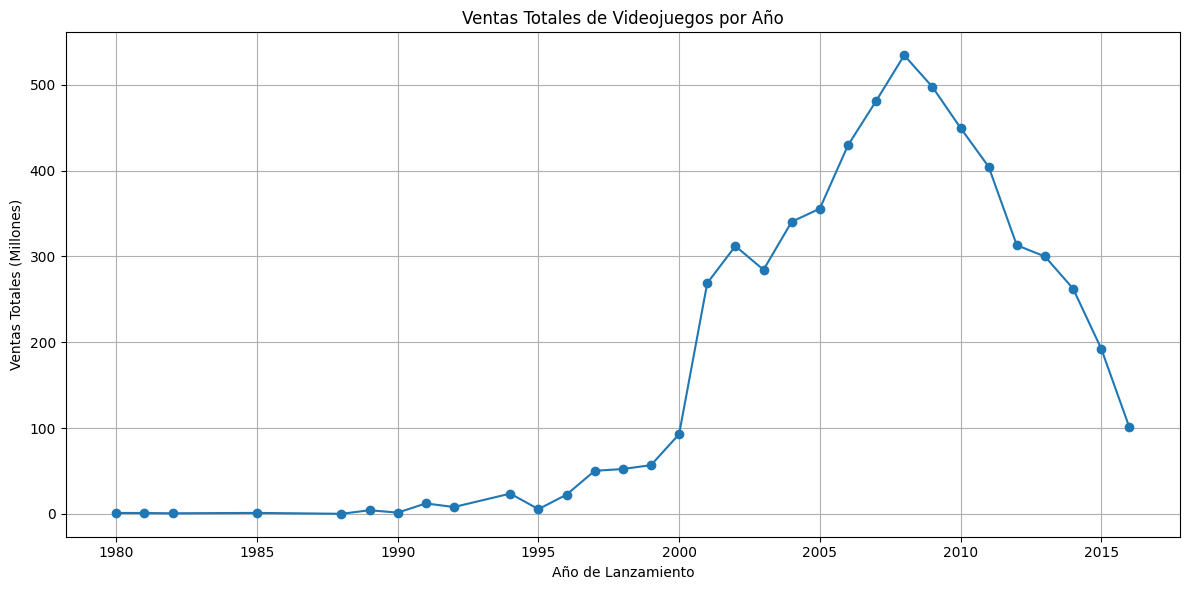

In [13]:
# tamaño figura
plt.figure(figsize=(12, 6)) # crear una figura

# gráfico
plt.plot(ventas_por_anio.index, ventas_por_anio.values, marker='o', linestyle='-')

# título gráfico
plt.title('Ventas Totales de Videojuegos por Año') # <-- plt.title()

# título eje x, y
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Millones)')

# tener cuadrícula
plt.grid(True)

# rotar etiquetas del eje X si se superponen
#plt.xticks(rotation=45) 

# ajustar layout
plt.tight_layout() 

# enseñar gráfico
plt.show()

### Gráfico de dispersión

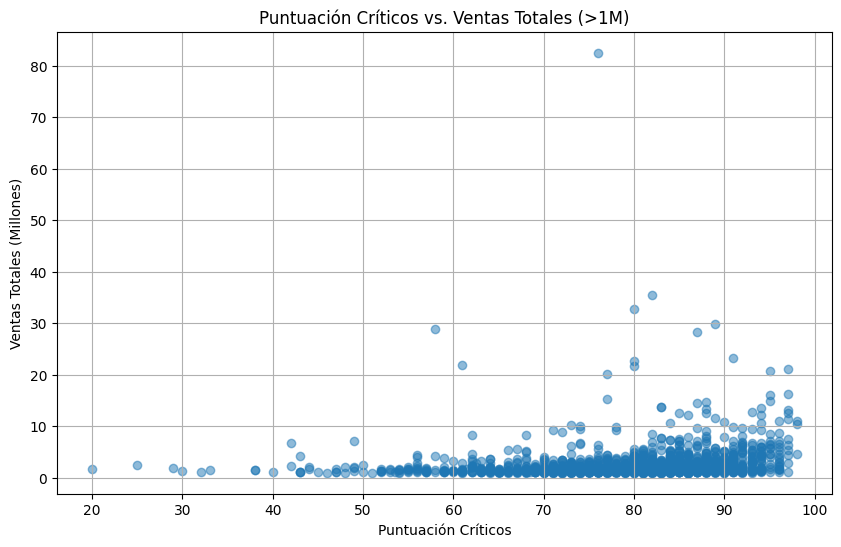

In [14]:
# comparar puntuación de críticos vs ventas (ej. solo para juegos > 1 millón)
df_filtrado_ventas = games_clean[games_clean['total_sales'] > 1].copy() # copia para evitar warnings
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado_ventas['critic_score'], df_filtrado_ventas['total_sales'], alpha=0.5)
plt.title('Puntuación Críticos vs. Ventas Totales (>1M)')
plt.xlabel('Puntuación Críticos')
plt.ylabel('Ventas Totales (Millones)')
plt.grid(True)
plt.show()

## **Visualización con Seaborn**

Seaborn simplifica la creación de gráficos estadísticos complejos y estéticamente agradables. Funciona excelente con DataFrames.

### Histograma

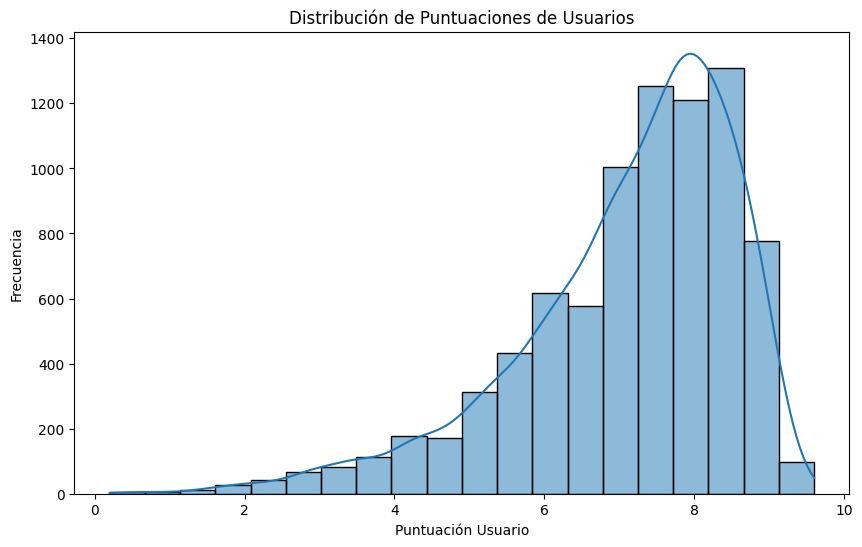

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(games_clean['user_score'].dropna(), bins=20, kde=True) # kde=True añade curva de densidad
plt.title('Distribución de Puntuaciones de Usuarios')
plt.xlabel('Puntuación Usuario')
plt.ylabel('Frecuencia')
plt.show()

### Diagrama de caja y bigote

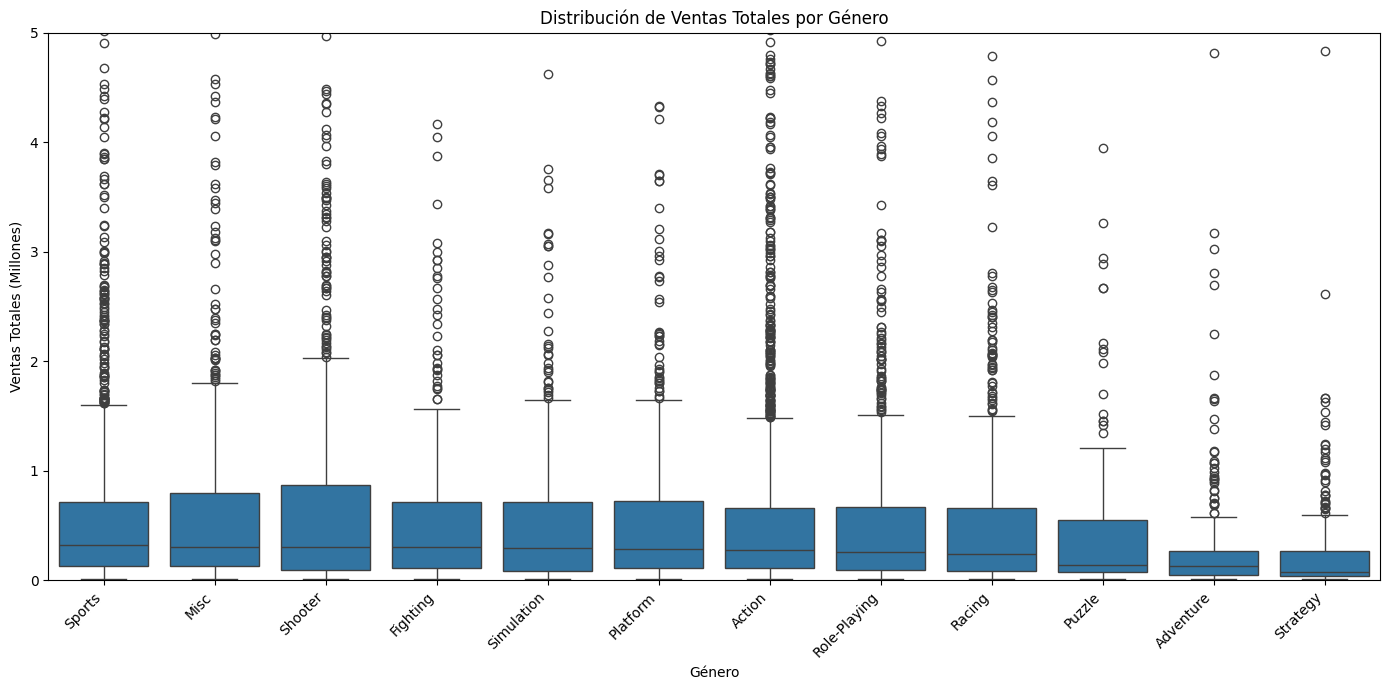

In [16]:
plt.figure(figsize=(14, 7))

# ordenar géneros por mediana de ventas para mejor visualización
order = games_clean.groupby('genre')['total_sales'].median().sort_values(ascending=False).index
sns.boxplot(data=games_clean, x='genre', y='total_sales', order=order)
plt.title('Distribución de Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (Millones)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5) # Limitar eje Y para ver mejor las cajas (ignorar outliers extremos)
plt.tight_layout()
plt.show()

### Violin plot

Boxplot muestra resumen (mediana, cuartiles, outliers). Violin muestra la *densidad* (dónde se concentran los datos).


--- Violin Plot (Seaborn) ---


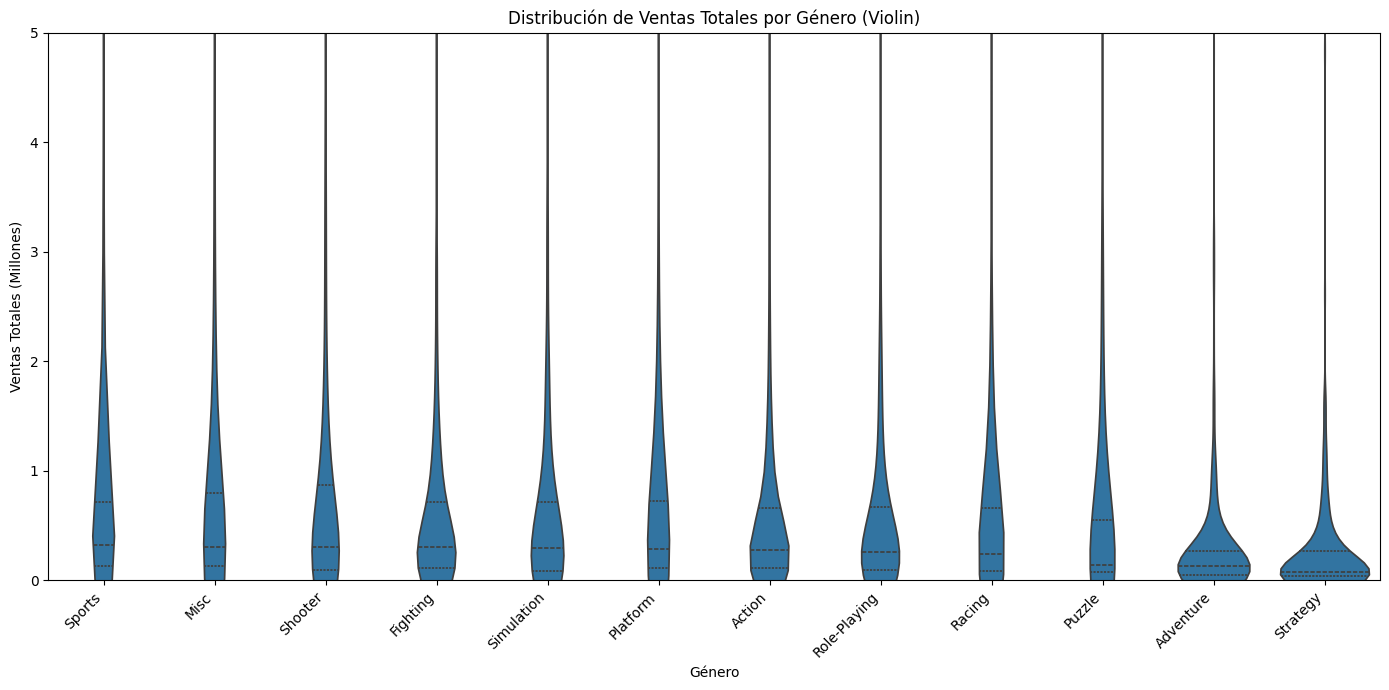

In [17]:
print("\n--- Violin Plot (Seaborn) ---")
plt.figure(figsize=(14, 7))
sns.violinplot(data=games_clean, x='genre', y='total_sales', order=order, inner='quartile') # inner='quartile' muestra medianas y cuartiles
plt.title('Distribución de Ventas Totales por Género (Violin)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (Millones)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

### Heatmap

Muestra qué tan relacionadas están las variables numéricas (1=perfecta, -1=inversa, 0=ninguna).

Seleccionar solo las columnas numéricas de nuestro DataFrame

La idea es calcular automáticamente la matriz de correlación de Pearson entre todas esas columnas numéricas. El resultado es una tabla donde cada celda muestra qué tan linealmente relacionadas están dos variables, con un valor entre -1 y 1.

In [18]:
columnas_numericas = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']
matriz_correlacion = games_clean[columnas_numericas].corr()

Usamos `seaborn.heatmap()` para visualizar esa tabla numérica. Un heatmap es perfecto porque usa colores para representar los valores, haciendo que los patrones salten a la vista.

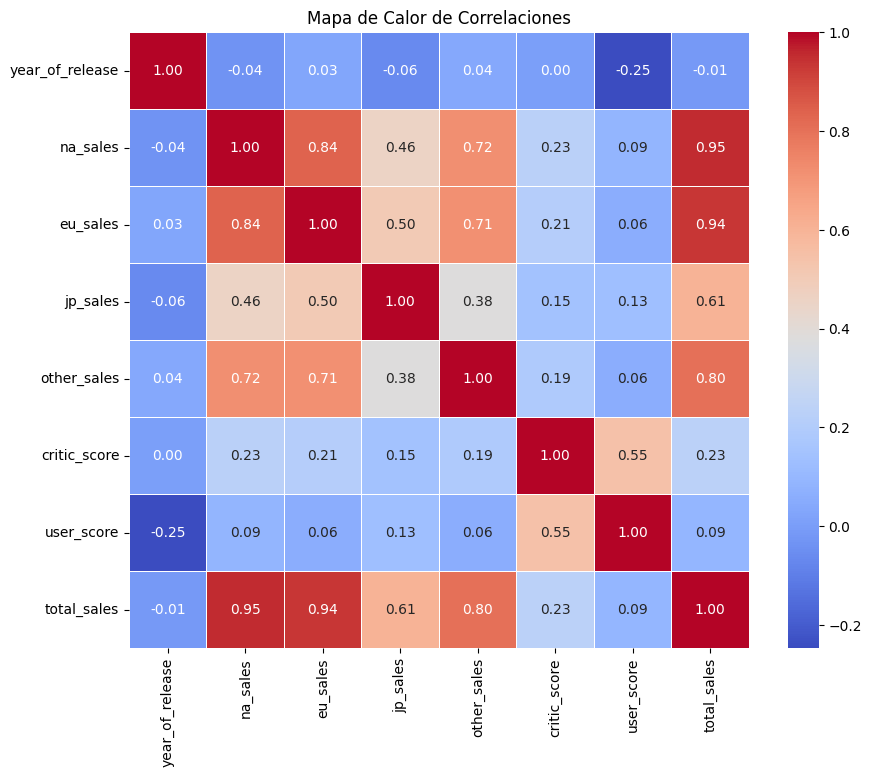

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # annot=True muestra valores
plt.title('Mapa de Calor de Correlaciones')
plt.show()

El objetivo de este gráfico es entender rápidamente cómo se relacionan nuestras variables numéricas entre sí. Buscamos responder preguntas como:

- Si un juego vende bien en Norteamérica (na_sales), ¿tiende a vender bien también en Europa (eu_sales)?
    - Esperaríamos una correlación positiva fuerte.

- ¿Los juegos con mejores puntuaciones de críticos (critic_score) tienden a vender más (ventas_totales)?
    - Podríamos esperar una correlación positiva, ¿pero qué tan fuerte es?.

- ¿Hay alguna relación inesperada?

Entender estas relaciones es crucial para la selección de variables para nuestro modelo de Machine Learning. Si dos variables están muy correlacionadas (ej., > 0.9), quizás solo necesitemos usar una de ellas en el modelo para evitar redundancia (multicolinealidad).

Este mapa de calor es una tabla visual. Miren la barra de colores a la derecha:
- Rojo intenso (cerca de 1.0): indica una correlación positiva fuerte. Cuando una variable sube, la otra tiende a subir también de forma lineal.
- Azul intenso (cerca de -1.0): indica una correlación negativa fuerte. Cuando una variable sube, la otra tiende a bajar de forma lineal.
- Colores Claros (cerca de 0.0): indican una correlación débil o nula. No hay una relación lineal clara entre las variables.

La diagonal principal siempre será 1.0 (rojo perfecto), porque cada variable está perfectamente correlacionada consigo misma. Lo interesante son los valores fuera de la diagonal.

Análisis del heatmap actual: 

- Ventas regionales muy Correlacionadas: rojos intensos entre `na_sales`, `eu_sales`, `other_sales` y `total_sales`. Los coeficientes son altos (ej., na_sales vs ventas_totales es 0.94). Esto tiene sentido: si un juego es popular, tiende a serlo en varias regiones, y las ventas regionales contribuyen directamente a las ventas totales.

- Correlación moderada entre scores y ventas: la relación entre `critic_score`/`user_score` y `ventas_totales`. Los valores son positivos (ej., critic_score vs ventas_totales es 0.24), pero no son rojos intensos. Sugiere que, aunque los juegos mejor puntuados tienden a vender más, la puntuación no es el único factor. Hay otros elementos en juego.

- Relación entre `scores`: `critic_score` y `user_score` tienen una correlación positiva moderada (0.58). Los críticos y los usuarios tienden a estar de acuerdo, pero no siempre.

- Año de lanzamiento: `year_of_release` tiene correlaciones muy bajas (cerca de 0) con la mayoría de las otras variables. Esto sugiere que el año en sí mismo (como número) no tiene una relación lineal fuerte con las ventas o las puntuaciones en este dataset. (Nota: Esto no significa que el año no sea importante, solo que su relación no es lineal simple).

## Visualización con Plotly Express

Plotly Express crea gráficos listos para web, con zoom, tooltips, etc.

### Gráfico de Dispersión Interactivo

In [ ]:
# filtrar para ver mejor 
games_filtrado = games_clean[games_clean['total_sales'] > 0.5].copy()

# gráfico de dispersión interactivo
print("\n--- Gráfico de Dispersión Interactivo (Plotly Express) ---")
fig_scatter = px.scatter(
    games_filtrado,       # DataFrame (filtrado o completo)
    x='critic_score',     # eje X
    y='total_sales',      # eje Y
    color='genre',        # colorear puntos según género
    size='total_sales',   # el tamaño del punto dependa de las ventas
    hover_name='videogame_names', # mostrar nombre del juego al pasar el mouse
    title='Puntuación Críticos vs Ventas Totales (>0.5M) (Interactivo)'
)

# mostrar el gráfico
fig_scatter.show()


--- Gráfico de Dispersión Interactivo (Plotly Express) ---


En caso de que salga error, poner `pip install --upgrade nbformat`

### Gráfico de Dispersión con facetas (`face_col`)

In [ ]:
# ver la relación Critic Score vs User Score, separada por Rating
fig_facet = px.scatter(
    games_clean, 
    x='critic_score',
    y='user_score',
    color='genre',
    facet_col='rating_esrb', # crea un gráfico por cada valor de rating_esrb
    facet_col_wrap=3, # número de columnas para las facetas
    title='Critic Score vs User Score por Clasificación ESRB'
)
fig_facet.show()


--- Gráfico de Dispersión con Facetas (Plotly Express) ---


### Sunburst

Gráfico para ver la distribución de distintas categorías y subcategorías, donde también se puede observar a través de datos numéricos. 

In [ ]:
df_grouped = games_clean.groupby(['platform', 'genre'])['total_sales'].sum().reset_index()
fig_sunburst = px.sunburst(
    df_grouped,
    path=['platform', 'genre'], # jerarquía
    values='total_sales',   # tamaño de las secciones
    title='Ventas Totales por Plataforma y Género'
)
fig_sunburst.show()